# Data Cleaning and Exploratory Data Analysis to understand the data quality for visualizations.

I chose this dataset as there are multiple visualizations on this dataset on various platforms. However, each of them have different answers and it made me think why is that so? Are we even looking at the quality of the data behind all of the visualizations? Let's answer this question.

This notebook includes Exploratory data analysis and extracting right data for accurate visualization.
Please read through the blocks to understand the steps taken to clean the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('archive/cost-of-living.csv')

In [3]:
data.head()

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1


In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          4874 non-null   object 
 1   country       4874 non-null   object 
 2   x1            4449 non-null   float64
 3   x2            4432 non-null   float64
 4   x3            4552 non-null   float64
 5   x4            4385 non-null   float64
 6   x5            4445 non-null   float64
 7   x6            4540 non-null   float64
 8   x7            4438 non-null   float64
 9   x8            4571 non-null   float64
 10  x9            4494 non-null   float64
 11  x10           4457 non-null   float64
 12  x11           4538 non-null   float64
 13  x12           4369 non-null   float64
 14  x13           4393 non-null   float64
 15  x14           4318 non-null   float64
 16  x15           4312 non-null   float64
 17  x16           4509 non-null   float64
 18  x17           4499 non-null 

In [6]:
#For basic visualizations give column names can cause confusions.

list(data)
data.columns = ['city','country','Meal, Inexpensive Restaurant','Meal for 2 People','McMeal at McDonalds',
                'Domestic Beer','Imported Beer','Cappuccino','Coke/Pepsi','Water','Milk',
                'Loaf of Fresh White Bread','Rice','Eggs','Local Cheese','Chicken Fillets',
                'Beef Round','Apples','Banana','Oranges','Tomato','Potato','Onion',
                'Lettuce','Water','Bottle of Wine','Domestic Beer','Imported Beer','Cigarettes 20 Pack','One-way Ticket (Local Transport)',
                'Monthly Pass','Taxi Start','Taxi 1km','Taxi 1hour Waiting','Gasoline(1L)','Volkswagen Golf','Toyota Corolla Sedan','Electricity, Heating, Cooling, Water, Garbage for 85m2 Apartment',
                '1 min. of Prepaid Mobile Tariff Local','Internet','Fitness Club - Monthly Fee','Tennis Court Rent','Cinema',
                'Preschool/Kindergarten','International Primary School','1 Pair of Jeans','1 Summer Dress',
                '1 Pair of Nike Running Shoes','1 Pair of Men Leather Business Shoes','Apartment (1 bedroom) in City Centre',
                'Apartment (1 bedroom) Outside of Centre','Apartment (3 bedrooms) in City Centre','Apartment (3 bedrooms) Outside of Centre',
                'Price per Square Meter to Buy Apartment in City Centre','Price per Square Meter to Buy Apartment Outside of Centre',
                'Average Monthly Net Salary','Mortgage Interest Rate in Percentages (%)','data_quality']
list(data)


['city',
 'country',
 'Meal, Inexpensive Restaurant',
 'Meal for 2 People',
 'McMeal at McDonalds',
 'Domestic Beer',
 'Imported Beer',
 'Cappuccino',
 'Coke/Pepsi',
 'Water',
 'Milk',
 'Loaf of Fresh White Bread',
 'Rice',
 'Eggs',
 'Local Cheese',
 'Chicken Fillets',
 'Beef Round',
 'Apples',
 'Banana',
 'Oranges',
 'Tomato',
 'Potato',
 'Onion',
 'Lettuce',
 'Water',
 'Bottle of Wine',
 'Domestic Beer',
 'Imported Beer',
 'Cigarettes 20 Pack',
 'One-way Ticket (Local Transport)',
 'Monthly Pass',
 'Taxi Start',
 'Taxi 1km',
 'Taxi 1hour Waiting',
 'Gasoline(1L)',
 'Volkswagen Golf',
 'Toyota Corolla Sedan',
 'Electricity, Heating, Cooling, Water, Garbage for 85m2 Apartment',
 '1 min. of Prepaid Mobile Tariff Local',
 'Internet',
 'Fitness Club - Monthly Fee',
 'Tennis Court Rent',
 'Cinema',
 'Preschool/Kindergarten',
 'International Primary School',
 '1 Pair of Jeans',
 '1 Summer Dress',
 '1 Pair of Nike Running Shoes',
 '1 Pair of Men Leather Business Shoes',
 'Apartment (1 bedroo

In [7]:
data.isnull().sum()

city                                                                   0
country                                                                0
Meal, Inexpensive Restaurant                                         425
Meal for 2 People                                                    442
McMeal at McDonalds                                                  322
Domestic Beer                                                        489
Imported Beer                                                        429
Cappuccino                                                           334
Coke/Pepsi                                                           436
Water                                                                303
Milk                                                                 380
Loaf of Fresh White Bread                                            417
Rice                                                                 336
Eggs                                               

In [8]:
#number of unique cities
n = len(pd.unique(data['city']))
n

4816

In [9]:
n = len(pd.unique(data['country']))
n

204

**The above two blocks show that there are 4874 rows and 4816 unique cities. That means the city column in this data pretty much acts as a unique value.**


In [10]:
nan_rows  = data.loc[data.isna().any(axis=1)]
nan_rows

,city,country,"Meal, Inexpensive Restaurant",Meal for 2 People,McMeal at McDonalds,Domestic Beer,Imported Beer,Cappuccino,Coke/Pepsi,Water,...,1 Pair of Men Leather Business Shoes,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary,Mortgage Interest Rate in Percentages (%),data_quality
37,Baoding,China,NaN,13.97,3.91,NaN,NaN,2.79,0.46,NaN,...,279.36,NaN,NaN,NaN,NaN,1955.50,NaN,523.79,3.00,0
40,Shijiazhuang,China,3.14,18.86,4.89,0.77,1.40,3.49,0.40,0.28,...,48.89,209.52,125.71,419.04,279.36,2514.21,1815.82,838.07,5.20,0
41,Linyi,China,2.79,20.95,4.19,1.12,1.96,2.68,0.41,0.21,...,108.25,209.52,111.74,628.55,349.20,2095.18,977.75,558.71,5.00,0
42,Nanyang,China,2.79,20.95,4.19,1.12,1.96,2.68,0.41,0.25,...,108.25,NaN,111.74,NaN,NaN,NaN,NaN,419.04,5.17,0
44,Weifang,China,2.79,13.97,5.24,1.12,2.10,3.40,0.70,0.28,...,83.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4870,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4871,Ixtapa Zihuatanejo,Mexico,5.19,31.13,12.97,0.99,NaN,1.82,0.62,0.42,...,103.78,415.11,259.44,518.89,415.11,NaN,NaN,NaN,NaN,0
4872,Iqaluit,Canada,29.78,74.61,13.77,6.70,8.93,3.72,3.54,4.10,...,NaN,NaN,NaN,2978.11,2978.11,NaN,NaN,NaN,6.53,0


**From a few numbers and situation with null values, I can conclude that missing data in this situation needs to be left alone as it can be later handled on Tableau.**
1) I cannot remove the row because of one missing value as it will cause a loss of more than 80% of the data and other important information it has in other columns.
2) We cannot replace it with the mean value of the column as each city represents a different observation (un-related to one another)

**The best way from here would be to keep the data and select the right filters on the tableau visualization board. We can use the lack of this data as a new project to predict their values. For eg, I can club the similar type of cities and make multiple groups. Classification can help me categorize different section of the expenses and using Classification Algorithm, I can predict the price of the missing value. Note, we do need much more data to have more accuracy. The current number of data will not suffice.**

*There is another game changer variable called "Data Quality" that tells us whether the quality of the data is good or bad. Let's explore that!*

In [11]:
len(data['city'].unique())

4816

In [12]:
data['data_quality'].value_counts()

0    3964
1     910
Name: data_quality, dtype: int64

In [13]:
#Top 20 countries with good quality data

country=data[data['data_quality']==1]['country']

plot_dt = pd.DataFrame(country.value_counts().iloc[0:35])
plot_dt.reset_index(inplace=True)
plot_dt = plot_dt.rename(columns={'index':'country','country':'count'})

Text(0, 0.5, 'Count')

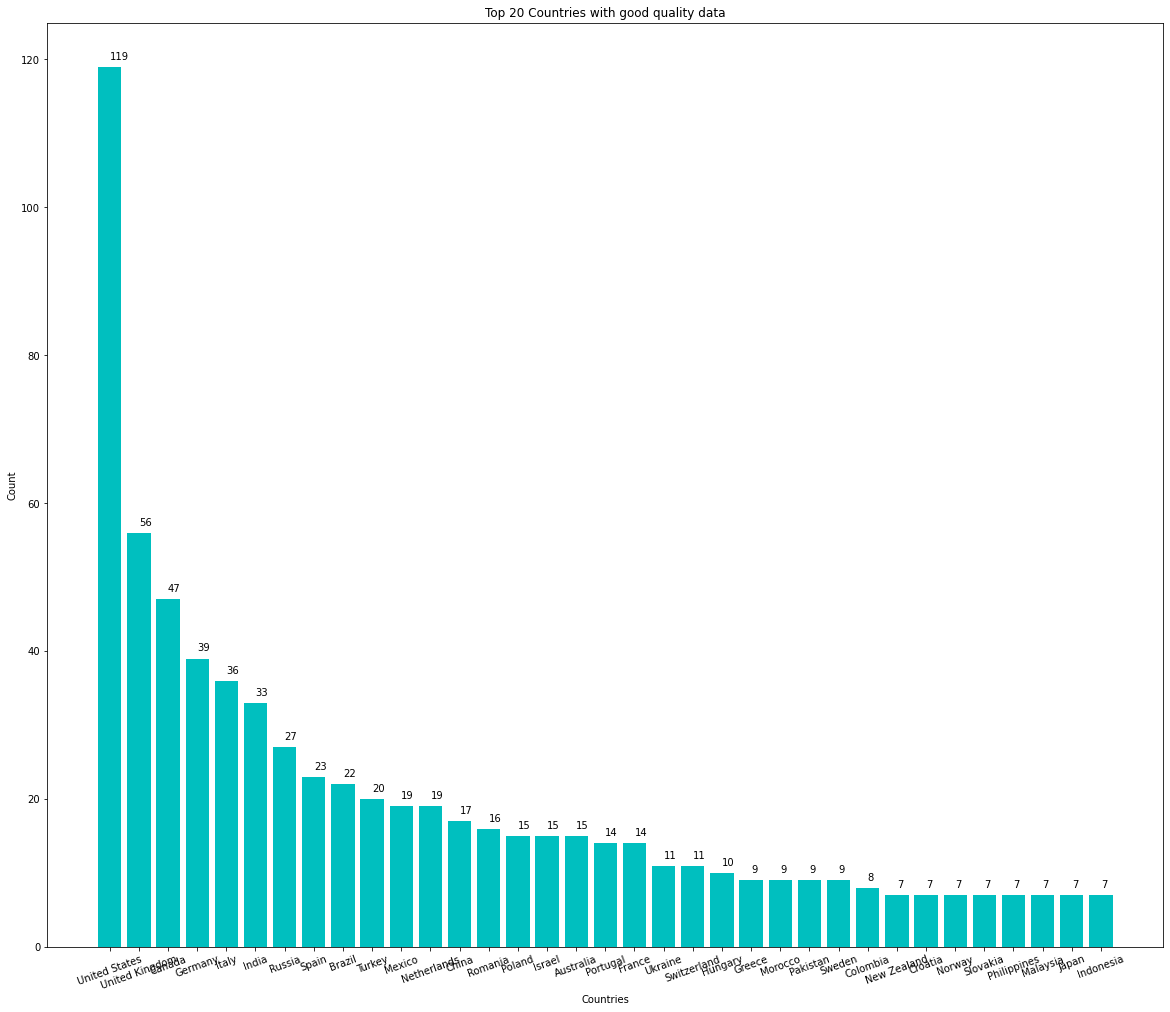

In [14]:
fig,ax = plt.subplots(figsize=(20,17))
ax.set_title('Top 20 Countries with good quality data')
plt.xticks(rotation = 20)
# annotating:
for i in range(len(plot_dt)):
    ax.annotate(plot_dt.loc[i,'count'],(plot_dt.loc[i,'country'],plot_dt.loc[i,'count']+1))

ax.bar(plot_dt['country'],plot_dt['count'],color='c')
ax.set_xlabel('Countries')
ax.set_ylabel('Count')

In [15]:
#Top 20 countries with bad quality data

country1=data[data['data_quality']==0]['country']

plot_dt1 = pd.DataFrame(country1.value_counts().iloc[0:30])
plot_dt1.reset_index(inplace=True)
plot_dt1 = plot_dt1.rename(columns={'index':'country','country':'count'})

Text(0, 0.5, 'Count')

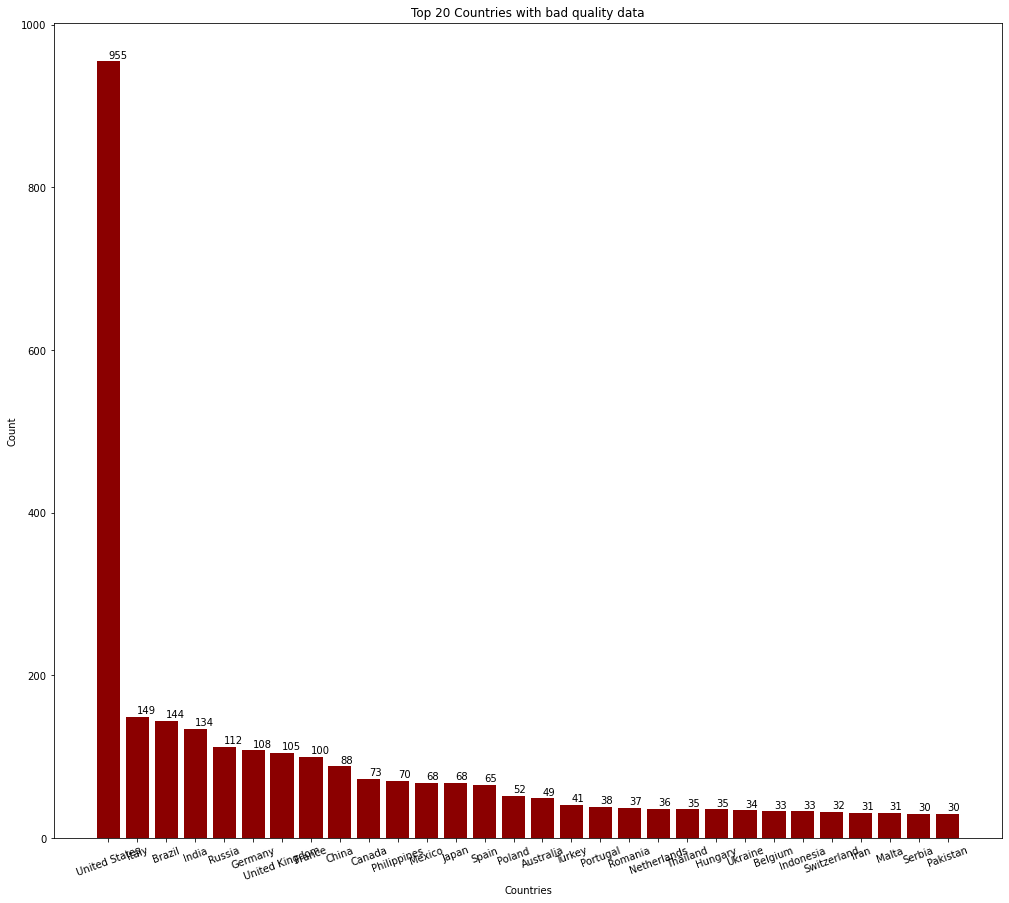

In [16]:
fig,ax = plt.subplots(figsize=(17,15))
ax.set_title('Top 20 Countries with bad quality data')
plt.xticks(rotation = 20)
ax.bar(plot_dt1['country'],plot_dt1['count'],color='darkred')
# annotating:
for i in range(len(plot_dt1)):
    ax.annotate(plot_dt1.loc[i,'count'],(plot_dt1.loc[i,'country'],plot_dt1.loc[i,'count']+4))

ax.set_xlabel('Countries')
ax.set_ylabel('Count')

If you look at the countries' list, the countries with good data also have bad data. Let's separate them both and look at their missing values. 

In [17]:
gooddata = data[data['data_quality']==1]
baddata = data[data['data_quality']==0]

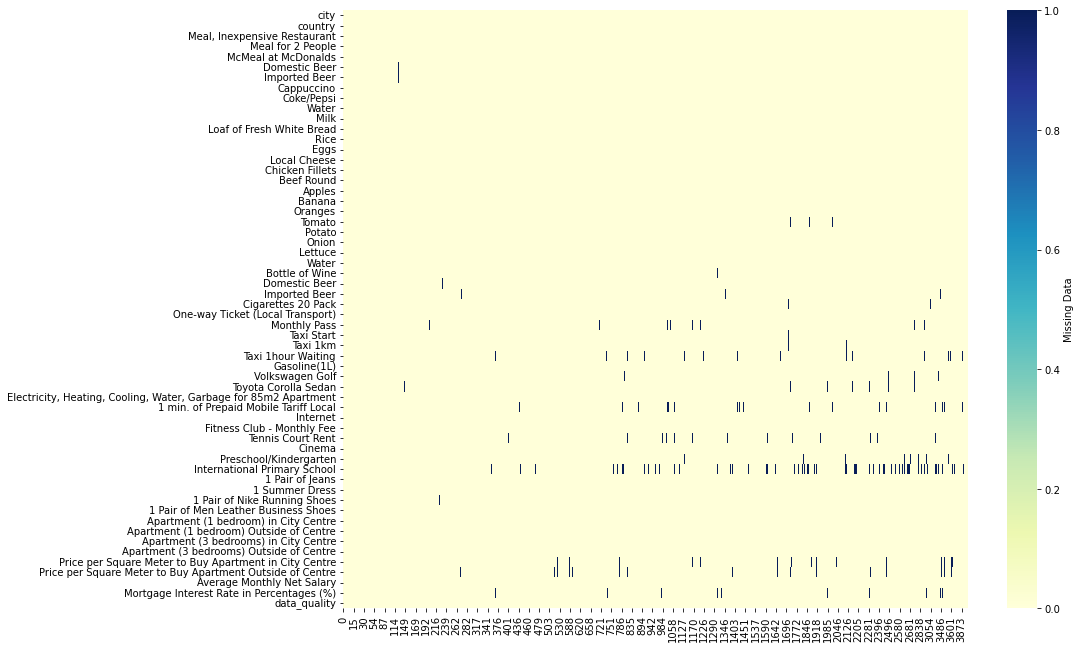

In [18]:
#Visualizing missing values in both good and bad data sets.
plt.figure(figsize=(14,11))
sns.heatmap(gooddata.isnull().transpose(),cmap='YlGnBu', cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing the missing values in good data")

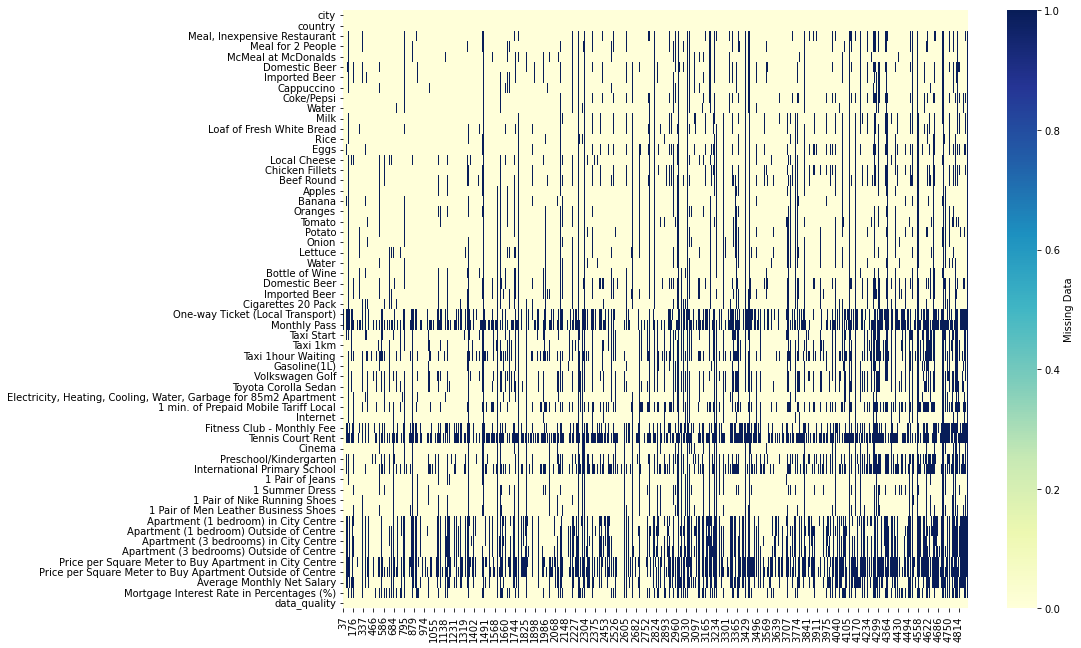

In [19]:
plt.figure(figsize=(14,11))
sns.heatmap(baddata.isnull().transpose(),cmap='YlGnBu', cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing the missing values in bad data")

**Clearly from both the heatmaps we can figure that good quality data has less number of missing values as compared to the bad data. More than 60% of values are missing from the bad data. The question is do we still need this data? And the answer is yes. The reasoning is given below in the conclusion.**

In [20]:
len(gooddata['country'].unique())

141

There are 141 unique countries with good data quality. However, the number of data for each country matters as that effects the overall quality of the country's data. Let's see how much data do we have for each country.

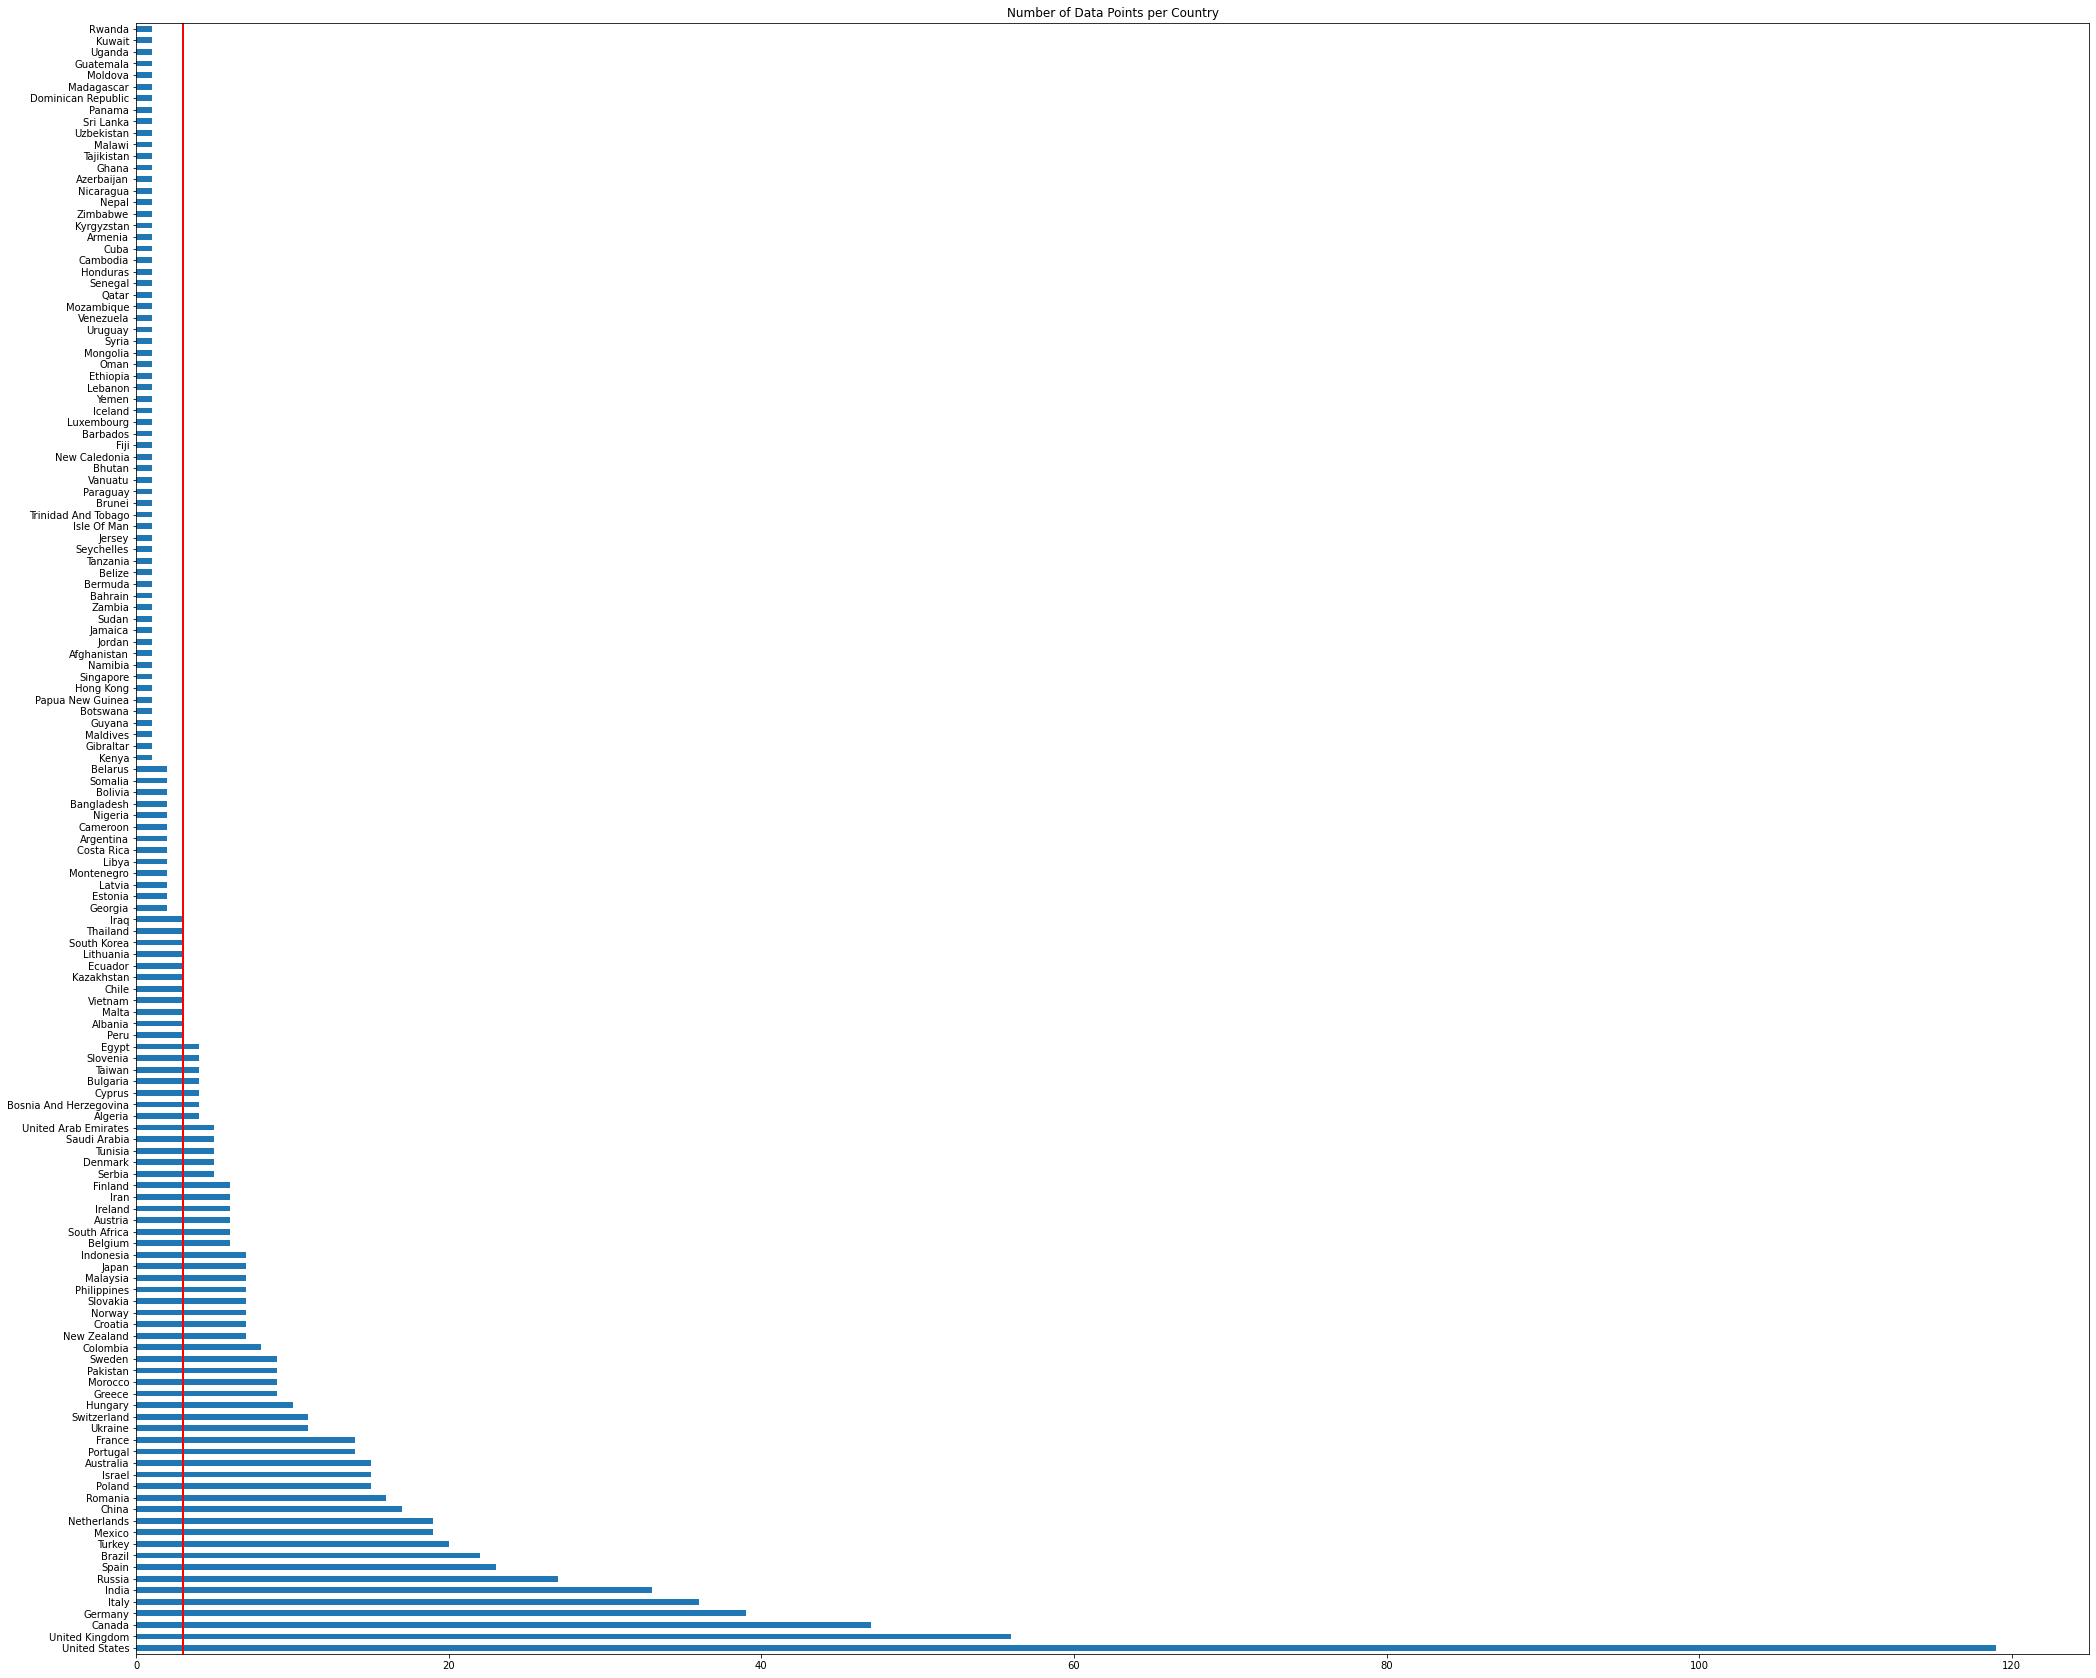

In [21]:
barplot = gooddata['country'].value_counts().plot(kind = 'barh', title='Number of Data Points per Country', figsize=(35,30))
barplot.axvline(x=3, color= 'red', linewidth=2,)


**Data of only 1 or 2 cities in the country is not enough to give accurate information about the countries' living costs. Thus, we will choose countries with atleast 3 data points to compare between countries's living costs.**

In [22]:
Final_Countries=pd.DataFrame()
Final_Countries=gooddata['country'].value_counts()
top = Final_Countries.gt(2)
result = Final_Countries[top]

print(len(result),'is the total number of countries with good quality data')
print(result)


64 is the total number of countries with good quality data
United States     119
United Kingdom     56
Canada             47
Germany            39
Italy              36
                 ... 
Ecuador             3
Lithuania           3
South Korea         3
Thailand            3
Iraq                3
Name: country, Length: 64, dtype: int64


In [39]:
#There are 64 countries and let's visualize their location on the world map.

final_result = pd.DataFrame(result)
final_result = final_result.reset_index()
final_result = final_result.rename(columns = {'index':'name','country':'count'})
final_result

,name,count
0,United States,119
1,United Kingdom,56
2,Canada,47
3,Germany,39
4,Italy,36
...,...,...
59,Ecuador,3
60,Lithuania,3
61,South Korea,3
62,Thailand,3


In [42]:
#missing values in the top 64 countries
country_list = final_result['name'].tolist()
gooddata = gooddata[gooddata['country'].isin(country_list)]
gooddata

,city,country,"Meal, Inexpensive Restaurant",Meal for 2 People,McMeal at McDonalds,Domestic Beer,Imported Beer,Cappuccino,Coke/Pepsi,Water,...,1 Pair of Men Leather Business Shoes,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary,Mortgage Interest Rate in Percentages (%),data_quality
0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,0.27,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,0.51,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,0.78,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,Haugesund,Norway,15.37,80.43,12.06,8.60,8.55,4.32,3.34,2.87,...,120.62,703.75,552.95,1306.93,1080.73,2473.18,2243.39,3310.20,2.57,1
4258,Lagos,Portugal,8.31,62.32,7.27,2.60,2.60,1.77,1.77,1.42,...,60.24,869.91,706.31,1627.29,1201.74,3467.10,3401.40,910.11,3.33,1
4341,Porto Calvo,Brazil,4.66,25.16,5.59,1.86,2.24,1.69,1.03,0.69,...,45.65,298.14,241.46,542.24,444.88,1229.83,1071.44,385.78,8.17,1
4426,Fairfax,United States,19.38,75.00,10.00,6.00,7.62,5.06,2.42,1.78,...,129.00,2200.00,1733.33,3560.00,2825.00,6754.35,2891.90,6117.78,4.90,1


<AxesSubplot:>

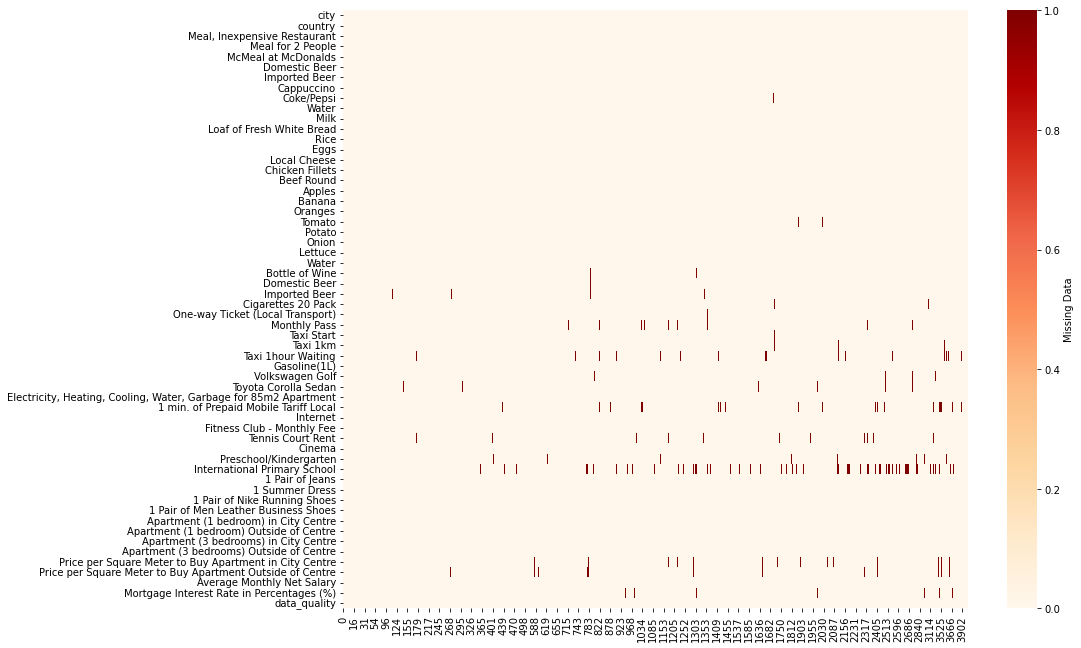

In [45]:
#visualizing the missing values in the 64 countries of good quality data
plt.figure(figsize=(14,11))
sns.heatmap(gooddata.isnull().transpose(),cmap='OrRd', cbar_kws={'label': 'Missing Data'})

**Even after extracting good quality data with top 64 countries with maximum occurances, we have several missing data points.**

In [24]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world = world[world["continent"] != "Antarctica"]

<AxesSubplot:>

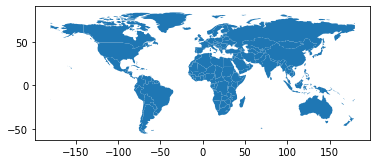

In [25]:
world.plot()

In [26]:
world[world['name'].str.startswith('Bo')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
30,11513100.0,South America,Bolivia,BOL,40895,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0..."
49,2303697.0,Africa,Botswana,BWA,18340,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."
170,3301000.0,Europe,Bosnia and Herz.,BIH,20164,"POLYGON ((18.56000 42.65000, 17.67492 43.02856..."


In [27]:
#Renaming the countries's names to match with the world dataframe to get the right geographical locations.

final_result.loc[0,'name'] = 'United States of America'
final_result.loc[47,'name'] = 'Bosnia and Herz.'
final_result

,name,count
0,United States of America,119
1,United Kingdom,56
2,Canada,47
3,Germany,39
4,Italy,36
...,...,...
59,Ecuador,3
60,Lithuania,3
61,South Korea,3
62,Thailand,3


In [28]:
world2 = pd.merge(world,final_result, how='left',on='name')

In [29]:
#Filling NaN values with 0 

world2 = world2.fillna(0)
world2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",47.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",119.0
...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",5.0
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.0
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.0
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.0


<AxesSubplot:>

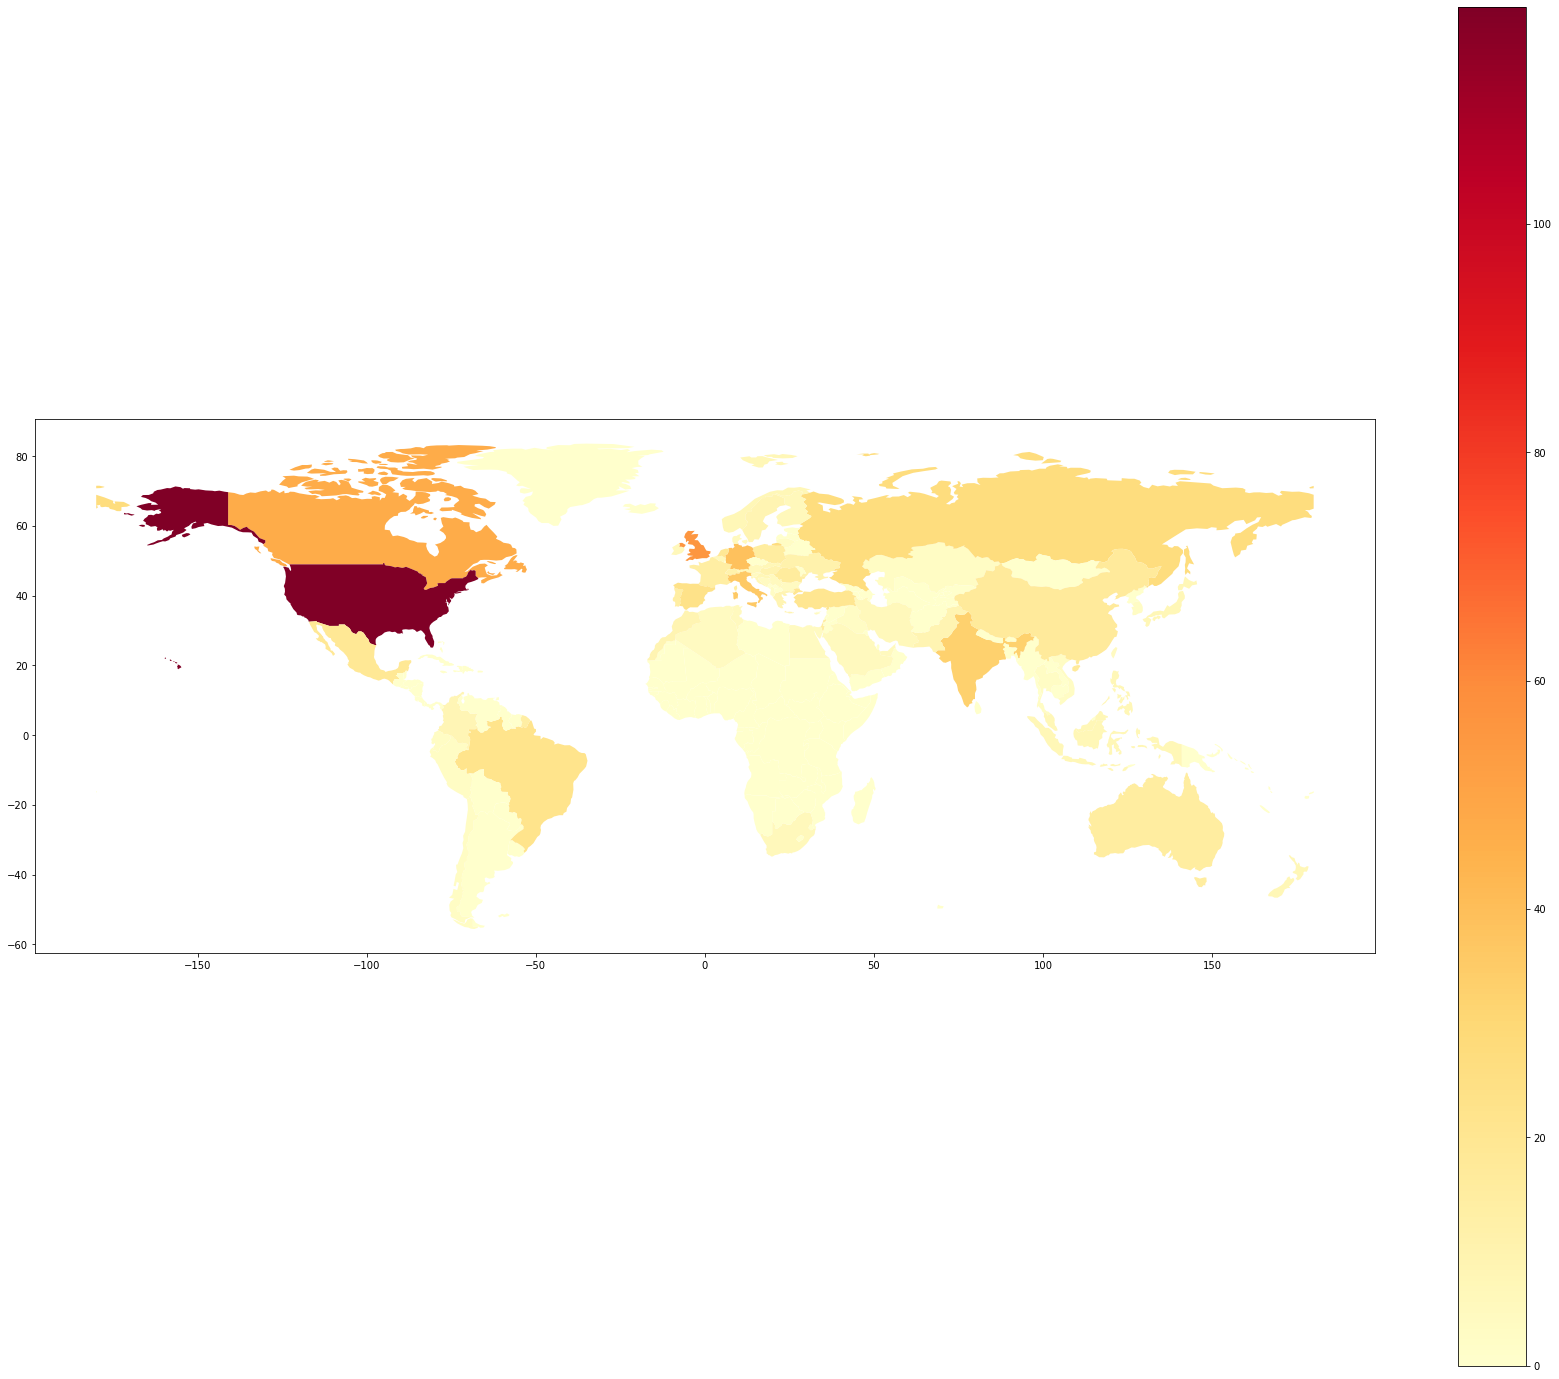

In [30]:
world2.plot(column='count',cmap='YlOrRd',legend=True,figsize=(30,25))

**Conclusion:**

From the map we can see that maximum number of good quality data lies in the United States Continent. Little less lies in some countries of Asia,Europe and the Austrailian continent. However, the data we have for African countries is very less for accurate visualization. 

Thus, for visualization purposes:
1) For country v/s country comparison, 'gooddata' with the top 64 countries with atleast 3 cities' data points for accurate results. 
2) For city v/s city comparison, I will use the same countries but not differentiate between good and bad data quality. From the above analysis we know that the only difference between good and bad data quality is the missing data for each row. We also have to realize that each row has a unique city and hence, we cannot lose that particular data which can give us important information.


We can understand this decision by a following example. What if New York City is the most expensive city in the US in terms of apartment rents. NYC is a unique row with data only existing in apartment rents column but data from other columns are absent. This will label the row as data_quality=0, and not consider the row while comparing housing expenses per city. In this case we are losing out on the most important information that we were looking for. It is important to remember that data_quality = 0 does not mean the data is not accurate, from our analysis we know that it means most number of data is absent from the columns.

*To answer the main question, is this dataset good enough to plot visualizations to generate results? The answer is No.*